In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

#load and preprocessing the data
(X_train,_), (X_test,_) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print(X_train.shape)
print(X_test.shape)

# Add noise to the input data
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
print(X_train_noisy.shape)
print(X_test_noisy.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train = X_train.reshape(len(X_train),np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test),np.prod(X_test.shape[1:]))
X_train_noisy = X_train_noisy.reshape(len(X_train_noisy), np.prod(X_train_noisy.shape[1:]))
X_test_noisy = X_test_noisy.reshape(len(X_test_noisy), np.prod(X_test_noisy.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#define autoencoder architecture
input_img=Input(shape=(784,))
encoded=Dense(128,activation='sigmoid')(input_img)
decoded=Dense(784,activation='sigmoid')(encoded)

#define sparse autoencoder
input_img1=Input(shape=(784,))
encodedSparse=Dense(128,activation='sigmoid',activity_regularizer=l1(10e-5))(input_img1)
decodedSparse=Dense(784,activation='sigmoid')(encodedSparse)



In [ ]:
autoencoder=Model(input_img,decoded)
autoencoderSparse=Model(input_img1,decodedSparse)


In [ ]:
#compile the model
autoencoder.compile(optimizer=Adam(),loss='binary_crossentropy')
autoencoderSparse.compile(optimizer=Adam(),loss='binary_crossentropy')

In [ ]:
#train the model
autoencoder.fit(X_train,X_train,epochs=5,batch_size=256,shuffle=True,validation_data=(X_test,X_test))
autoencoderSparse.fit(X_train,X_train,epochs=5,batch_size=256,shuffle=True,validation_data=(X_test,X_test))
autoencoder.fit(X_train_noisy,X_train,epochs=5,batch_size=256,shuffle=True,validation_data=(X_test_noisy,X_test))

Epoch 1/5
235/235 [==============================] - 4s 14ms/step - loss: 0.2821 - val_loss: 0.2362
Epoch 2/5
235/235 [==============================] - 4s 19ms/step - loss: 0.2128 - val_loss: 0.1923
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.1802 - val_loss: 0.1674
Epoch 4/5
235/235 [==============================] - 3s 14ms/step - loss: 0.1595 - val_loss: 0.1503
Epoch 5/5
235/235 [==============================] - 3s 13ms/step - loss: 0.1448 - val_loss: 0.1375
Epoch 1/5
235/235 [==============================] - 5s 18ms/step - loss: 0.2877 - val_loss: 0.2371
Epoch 2/5
235/235 [==============================] - 3s 14ms/step - loss: 0.2130 - val_loss: 0.1923
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.1796 - val_loss: 0.1663
Epoch 4/5
235/235 [==============================] - 4s 19ms/step - loss: 0.1582 - val_loss: 0.1486
Epoch 5/5
235/235 [==============================] - 3s 14ms/step - loss: 0.1430 - val_loss: 0.1355


In [ ]:
import matplotlib.pyplot as plt

313/313 [==============================] - 1s 3ms/step


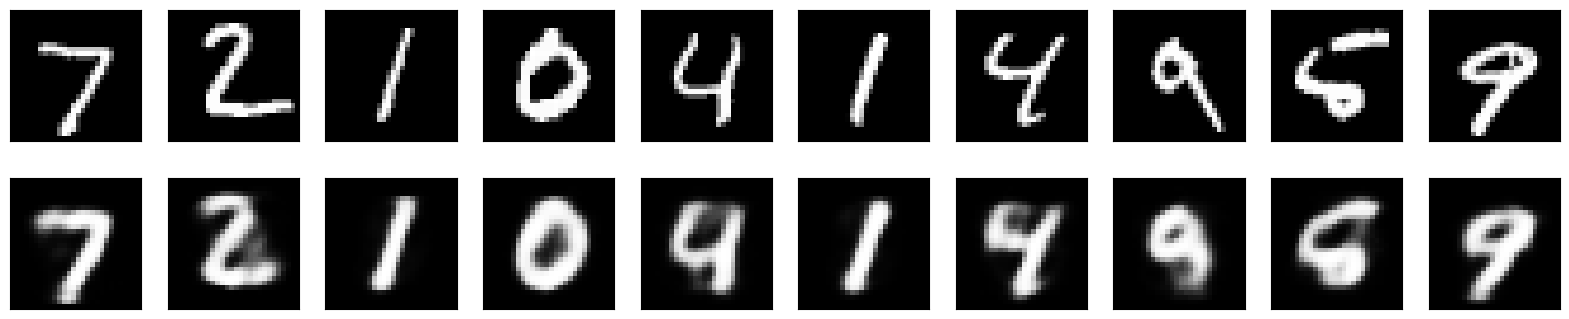

In [ ]:
#encode and decode

encoded_imgs=autoencoder.predict(X_test)
#decoded_imgs=autoencoder.predict(X_test_noisy)
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #display reconstruction
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(encoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 2ms/step


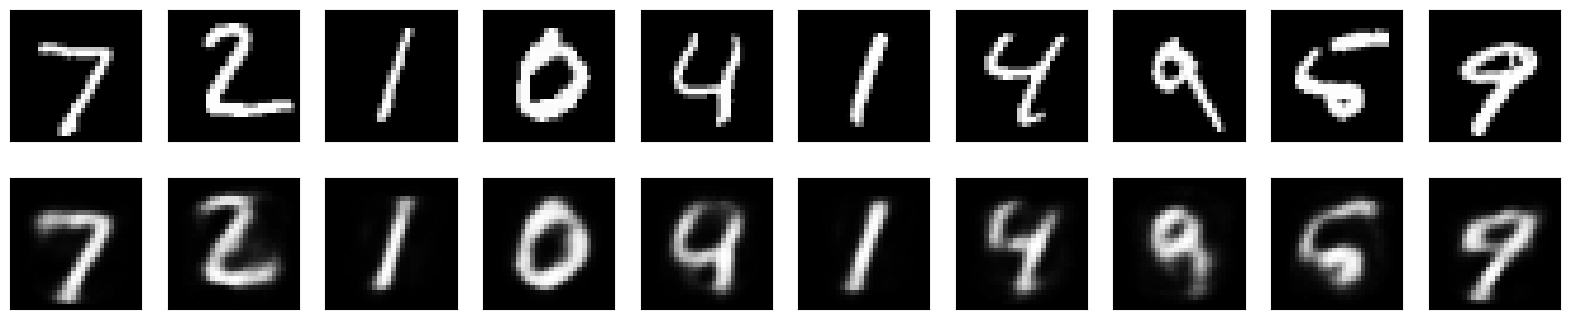

In [ ]:
#encode and decode

encoded_imgs=autoencoderSparse.predict(X_test)
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #display reconstruction
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(encoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 2ms/step


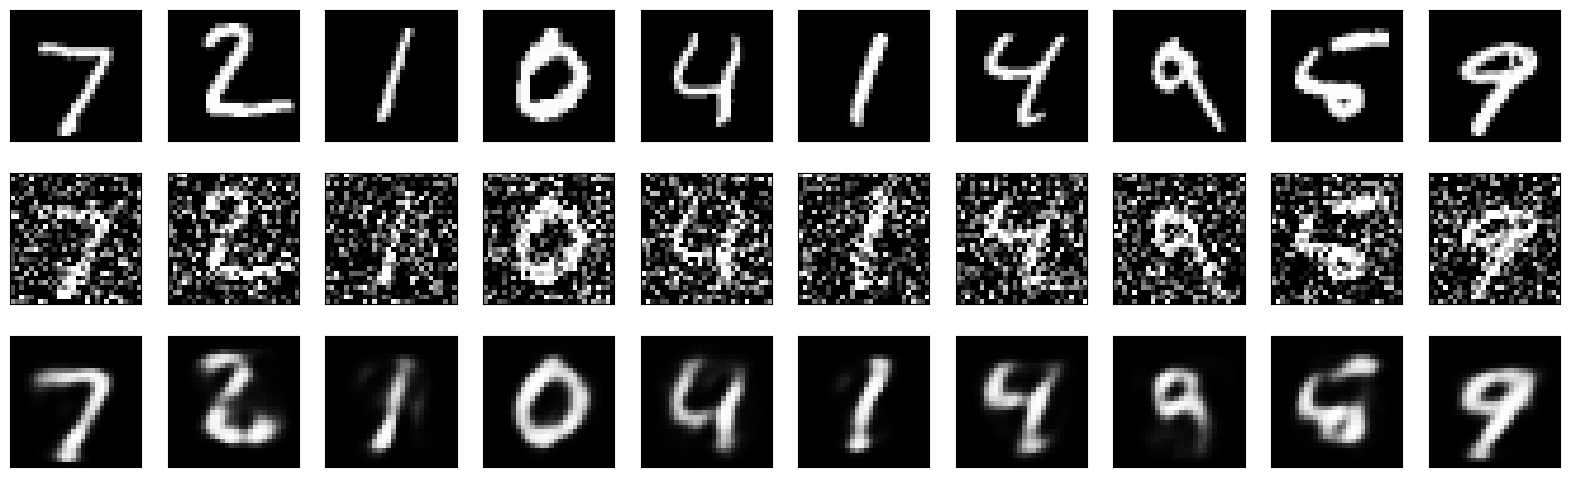

In [ ]:
decoded_imgs = autoencoder.predict(X_test_noisy)

# Display the original, noisy, and reconstructed images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()